In [18]:
import numpy as np
import pandas as pd #The pandas library
from pandas import Series, DataFrame #Main pandas data structures
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import seaborn as sns #A more fancy plotting library
pd.options.mode.chained_assignment = None  # default='warn'
import scipy as sp #library for scientific computations
from scipy import stats #The statistics part of the library
from numpy import median

def createPairGrid(df, population_density):
    fg = sns.PairGrid(df, hue='continent',                       
                       x_vars=["gdp_per_capita", "hospital_beds_per_thousand", population_density],
                       y_vars=["total_cases_per_million", "total_deaths_per_million", 'mortality_rate'],aspect=1.5,height=3)
    fg.map(sns.scatterplot)
    fg.add_legend()
    
def initIndicChar(df, population_density):
    indicators = [df['total_cases_per_million'].notnull(),
              df['mortality_rate'].notnull(), 
              df['total_deaths_per_million'].notnull()]

    characteristics = [df['gdp_per_capita'].notnull(),
                  df['hospital_beds_per_thousand'].notnull(),
                  df[population_density].notnull()]

    
    
    return [indicators,characteristics]
    
def calcPvalue(indicators,characteristics):
    
    correl_pvalues_under005 = []
    
    print("\033[1m \033[92m Correlations with pvalue < 0.05 are with green color\033[0m \n")

    for indic in indicators:
        for char in characteristics:
            stat = stats.ttest_ind(indic, char,equal_var = False)

            if(stat.pvalue < 0.05):
                print("\033[1m  Difference  between \033[94m", indic.name,"and ", 
                  char.name,":\033[0m\n \033[92m \033[4m",stat ,"\033[0m\n")

                correl_pvalues_under005.append([indic.name,char.name])
            else:
                print("\033[1m  Difference  between \033[94m", indic.name,"and ", 
                  char.name,":\033[0m\n",stat ,"\n")  

def calcPearsonCorC(indicators,characteristics):
    
    print("\033[1m \033[92m Bellow we calculate the Pearson Correlation Coefficient: \033[0m \n")
    
    for indic in indicators:
        for char in characteristics:
            
            stat1 = stats.pearsonr(indic, char)
            print("\033[1m  Difference  between \033[94m", indic.name,"and ", 
                  char.name,":\033[0m\n ", stat1,"\033[0m\n")

                
df = pd.read_csv('owid-covid-data.csv')

covid_df = df[df['date']=='2020-11-01']

mortality_rate =covid_df.total_deaths_per_million/covid_df.total_cases_per_million

covid_df['mortality_rate'] = mortality_rate

mortality_rate_notNull = covid_df['mortality_rate'].notnull()

covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mortality_rate
228,ABW,North America,Aruba,2020-11-01,4513.0,41.0,14.714,38.0,1.0,0.286,...,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,0.008420
561,AFG,Asia,Afghanistan,2020-11-01,41501.0,76.0,104.714,1536.0,0.0,3.571,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498,0.037011
812,AGO,Africa,Angola,2020-11-01,10558.0,289.0,247.000,279.0,4.0,2.000,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,0.026426
1058,AIA,North America,Anguilla,2020-11-01,3.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN,NaN
1322,ALB,Europe,Albania,2020-11-01,20875.0,241.0,288.143,509.0,7.0,5.143,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785,0.024383


# Plots with linear population density for all the countries

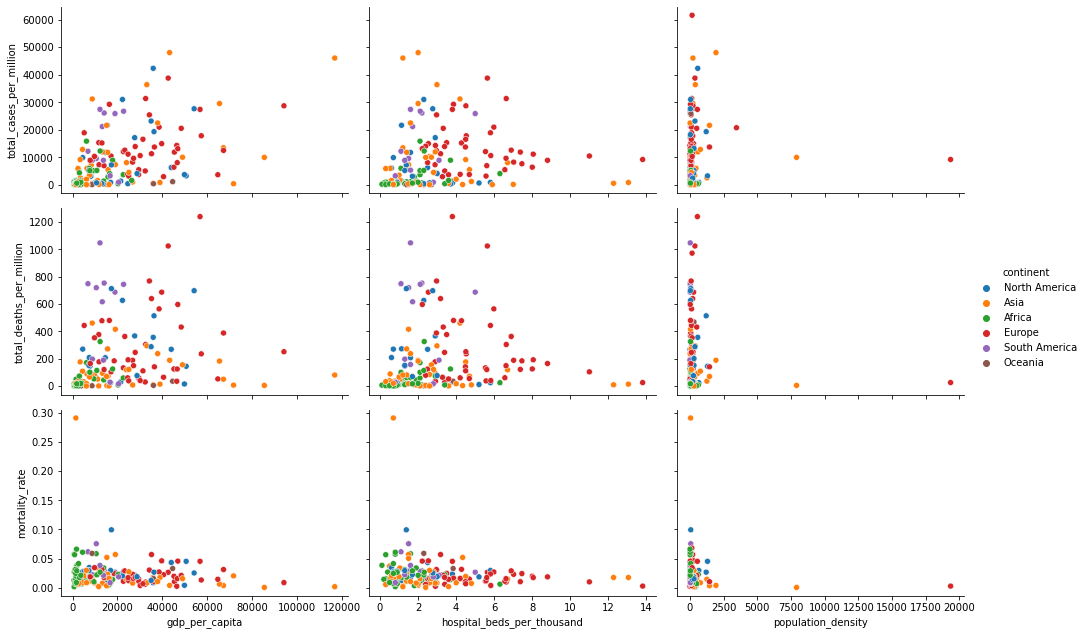

In [3]:
createPairGrid(covid_df,'population_density')

# Observations for the population density

According to the above plots we observe that we have moderate association between Covid 19 spread and population density.<br>
Most of the countries' population density is close to zero while the mortality rate, total deaths and total cases are greater or equal to zero.<br>
We also observe that the mortality rate in comparison to total deaths and total cases is not so high for the majority of the countries, and this is something that we expected for since it represents the ratio of total deaths to total cases <br>
Except two countries (one in Asia and one in Europe), which have high population density and zero mortality deaths and cases.


# Plots with log of population_density

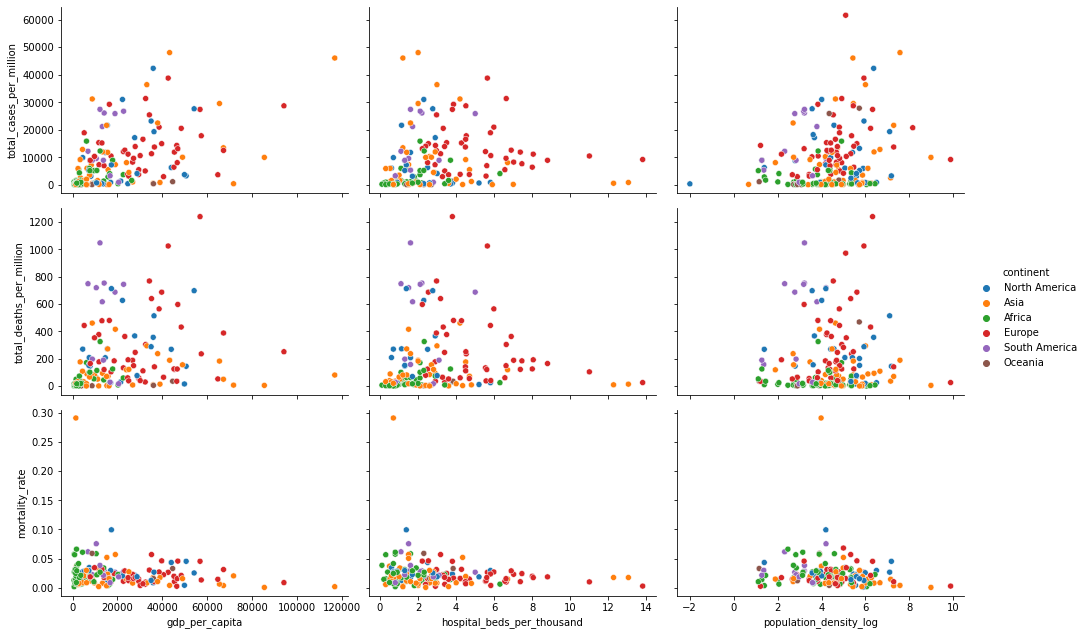

In [4]:
covid_df['population_density_log'] = np.log(covid_df['population_density']) 
createPairGrid(covid_df, 'population_density_log')

# Observation for the log of population_density



# Plots with linear population density without the African Countries

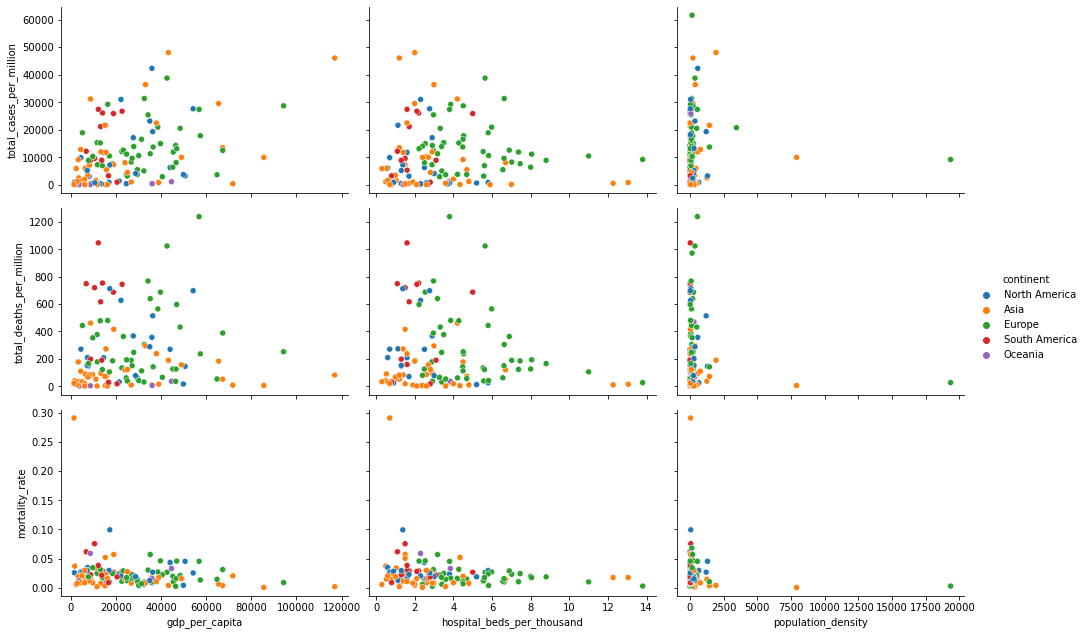

In [5]:
covid_noAfr_df = covid_df[covid_df['continent']!='Africa']
createPairGrid(covid_noAfr_df, 'population_density')

#  Plots with log population density without the African Countries

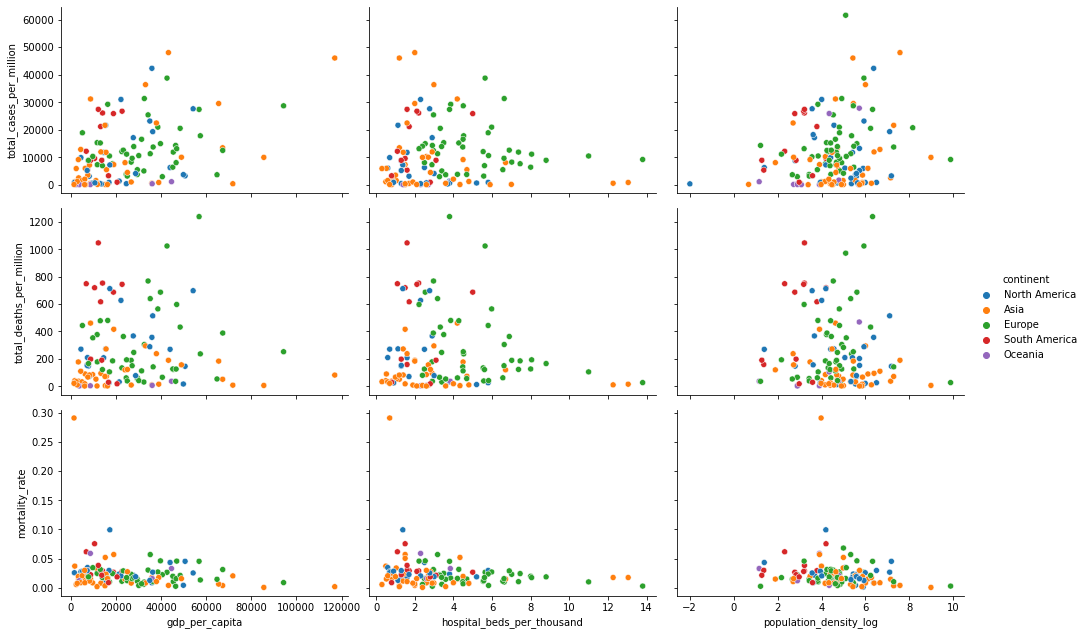

In [6]:
covid_noAfr_df['population_density_log'] = np.log(covid_df['population_density']) 
createPairGrid(covid_noAfr_df, 'population_density_log')

# Plots with linear population density ONLY for European countries

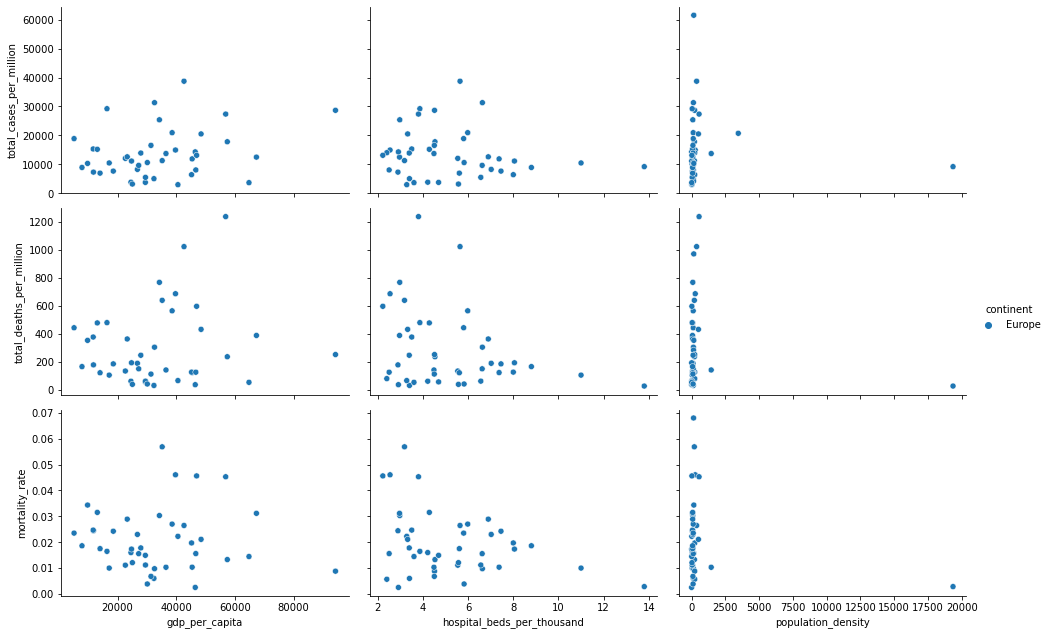

In [7]:
covid_onlyEU_df = covid_df[covid_df['continent']=='Europe']
createPairGrid(covid_onlyEU_df, 'population_density')

# Plots with log population density ONLY for European countries

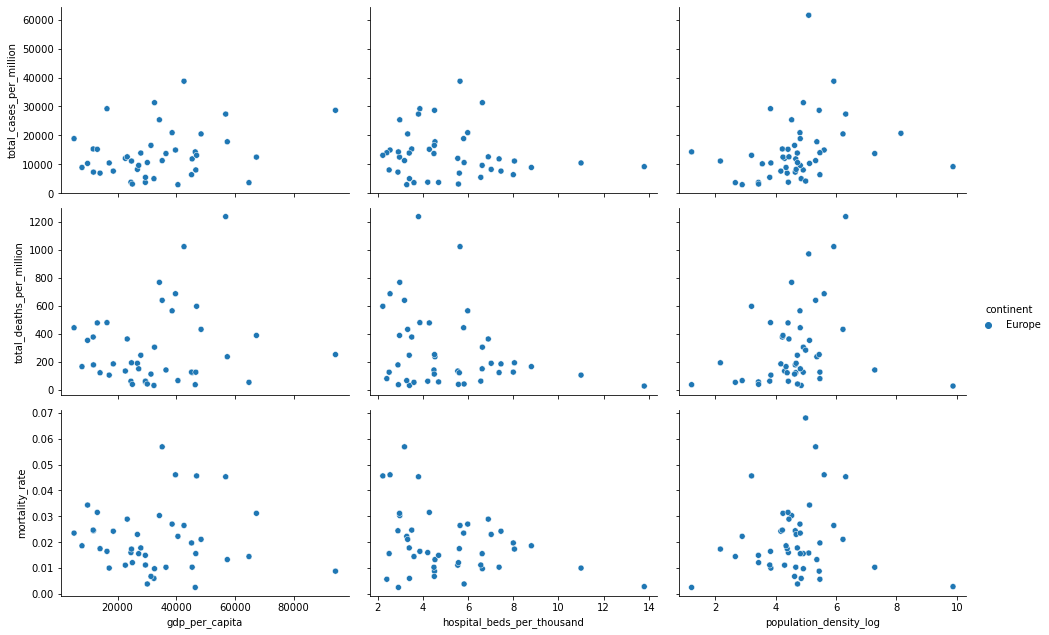

In [8]:
covid_onlyEU_df['population_density_log'] = np.log(covid_df['population_density']) 
createPairGrid(covid_onlyEU_df, 'population_density_log')


# Pearson Correlation Coefficient with linear population density for all countries 

In [9]:
indicAndChar = initIndicChar(covid_df, 'population_density')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (nan, nan) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (0.1807435520617362, 0.007891258435689668) 

  Difference  between  total_cases_per_million and  population_density :
  (0.178693865568452, 0.008637897891696611) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.24916872553122224, 0.00022371587245995938) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.16463773495579698, 0.015670391781624986) 

  Difference  between  mortality_rate and  population_density :
  (0.21991501002363759, 0.0011719739445569782) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.24916872553122224, 0.00022371587245995938) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.16463773495579698, 0.015670391781624986) 

  Difference  

# Pearson Correlation Coefficient with log population density for all countries

In [10]:
indicAndChar = initIndicChar(covid_df, 'population_density_log')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (0.10357128911741623, 0.13005772097611087) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (0.1807435520617362, 0.007891258435689668) 

  Difference  between  total_cases_per_million and  population_density_log :
  (0.178693865568452, 0.008637897891696611) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.24916872553122224, 0.00022371587245995938) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.16463773495579698, 0.015670391781624986) 

  Difference  between  mortality_rate and  population_density_log :
  (0.21991501002363759, 0.0011719739445569782) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.24916872553122224, 0.00022371587245995938) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.16463773495579698

# Pearson Correlation Coefficient with linear population density without the African Countries

In [11]:
indicAndChar = initIndicChar(covid_noAfr_df, 'population_density')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (0.09950722645221187, 0.21059952806916754) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (0.22071474368987382, 0.00503745879313329) 

  Difference  between  total_cases_per_million and  population_density :
  (0.19175472242472763, 0.015136593367021457) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.2562192625459083, 0.001074330615666189) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.245020103288534, 0.0017918381804930014) 

  Difference  between  mortality_rate and  population_density :
  (0.2501461589260999, 0.0014217839871731035) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.2562192625459083, 0.001074330615666189) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.245020103288534, 0.001791838180

# Pearson Correlation Coefficient with log population density without the African Countries

In [12]:
indicAndChar = initIndicChar(covid_noAfr_df, 'population_density_log')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (0.09950722645221187, 0.21059952806916754) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (0.22071474368987382, 0.00503745879313329) 

  Difference  between  total_cases_per_million and  population_density_log :
  (0.19175472242472763, 0.015136593367021457) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.2562192625459083, 0.001074330615666189) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.245020103288534, 0.0017918381804930014) 

  Difference  between  mortality_rate and  population_density_log :
  (0.2501461589260999, 0.0014217839871731035) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.2562192625459083, 0.001074330615666189) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.245020103288534, 0.0017

# Pearson Correlation Coefficient  with linear population density ONLY for European countries

In [493]:
indicAndChar = initIndicChar(covid_onlyEU_df, 'population_density')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (nan, nan) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (nan, nan) 

  Difference  between  total_cases_per_million and  population_density :
  (nan, nan) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.5400617248673217, 4.308053622562427e-05) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.5796011559684813, 8.319915727823998e-06) 

  Difference  between  mortality_rate and  population_density :
  (0.29166666666666663, 0.037832139086519834) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.5400617248673217, 4.308053622562427e-05) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.5796011559684813, 8.319915727823998e-06) 

  Difference  between  total_deaths_per_million and  population_density :
  (0.291

#  Pearson Correlation Coefficient  with log population density ONLY for European countries


# P-value with linear population density for all countries 

In [14]:
indicAndChar = initIndicChar(covid_onlyEU_df, 'population_density_log')
calcPearsonCorC(indicAndChar[0], indicAndChar[1])

  Bellow we calculate the Pearson Correlation Coefficient:  

  Difference  between  total_cases_per_million and  gdp_per_capita :
  (nan, nan) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
  (nan, nan) 

  Difference  between  total_cases_per_million and  population_density_log :
  (nan, nan) 

  Difference  between  mortality_rate and  gdp_per_capita :
  (0.5400617248673217, 4.308053622562427e-05) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
  (0.5796011559684813, 8.319915727823998e-06) 

  Difference  between  mortality_rate and  population_density_log :
  (0.29166666666666663, 0.037832139086519834) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
  (0.5400617248673217, 4.308053622562427e-05) 

  Difference  between  total_deaths_per_million and  hospital_beds_per_thousand :
  (0.5796011559684813, 8.319915727823998e-06) 

  Difference  between  total_deaths_per_million and  population_density_lo

# P-value with log population density for all countries 

In [16]:
indicAndChar = initIndicChar(covid_df, 'population_density_log')
calcPvalue(indicAndChar[0], indicAndChar[1])

  Correlations with pvalue < 0.05 are with green color 

  Difference  between  total_cases_per_million and  gdp_per_capita :
   Ttest_indResult(statistic=5.1773694709934786, pvalue=4.658835796706641e-07) 



NameError: name 'correl_pvalues_under005' is not defined

# P-value with linear population density without the African Countries

In [19]:
indicAndChar = initIndicChar(covid_noAfr_df, 'population_density')
calcPvalue(indicAndChar[0], indicAndChar[1])

  Correlations with pvalue < 0.05 are with green color 

  Difference  between  total_cases_per_million and  gdp_per_capita :
   Ttest_indResult(statistic=5.04332394930567, pvalue=1.0783893919001051e-06) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
   Ttest_indResult(statistic=5.822593576906874, pvalue=2.5575249404243363e-08) 

  Difference  between  total_cases_per_million and  population_density :
   Ttest_indResult(statistic=2.566656148603908, pvalue=0.010937933676365802) 

  Difference  between  mortality_rate and  gdp_per_capita :
 Ttest_indResult(statistic=0.7744797754553742, pvalue=0.43922660290756244) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
 Ttest_indResult(statistic=1.631594452252462, pvalue=0.10378009870260813) 

  Difference  between  mortality_rate and  population_density :
   Ttest_indResult(statistic=-2.0286187708998096, pvalue=0.043404633984851886) 

  Difference  between  total_deaths_per_million an

# P-value with log population density without the African Countries

In [20]:
indicAndChar = initIndicChar(covid_noAfr_df, 'population_density_log')
calcPvalue(indicAndChar[0], indicAndChar[1])

  Correlations with pvalue < 0.05 are with green color 

  Difference  between  total_cases_per_million and  gdp_per_capita :
   Ttest_indResult(statistic=5.04332394930567, pvalue=1.0783893919001051e-06) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
   Ttest_indResult(statistic=5.822593576906874, pvalue=2.5575249404243363e-08) 

  Difference  between  total_cases_per_million and  population_density_log :
   Ttest_indResult(statistic=2.566656148603908, pvalue=0.010937933676365802) 

  Difference  between  mortality_rate and  gdp_per_capita :
 Ttest_indResult(statistic=0.7744797754553742, pvalue=0.43922660290756244) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
 Ttest_indResult(statistic=1.631594452252462, pvalue=0.10378009870260813) 

  Difference  between  mortality_rate and  population_density_log :
   Ttest_indResult(statistic=-2.0286187708998096, pvalue=0.043404633984851886) 

  Difference  between  total_deaths_per_mi

# P-value with linear population density ONLY for European countries

In [21]:
indicAndChar = initIndicChar(covid_onlyEU_df, 'population_density')
calcPvalue(indicAndChar[0], indicAndChar[1])

  Correlations with pvalue < 0.05 are with green color 

  Difference  between  total_cases_per_million and  gdp_per_capita :
   Ttest_indResult(statistic=3.273268353539886, pvalue=0.0019322764923249058) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
   Ttest_indResult(statistic=3.049971406652093, pvalue=0.003655242507956128) 

  Difference  between  total_cases_per_million and  population_density :
 Ttest_indResult(statistic=1.767766952966369, pvalue=0.08320158879897606) 

  Difference  between  mortality_rate and  gdp_per_capita :
 Ttest_indResult(statistic=1.8569533817705188, pvalue=0.06685371641407638) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
 Ttest_indResult(statistic=1.6004609991611993, pvalue=0.11317998911092457) 

  Difference  between  mortality_rate and  population_density :
 Ttest_indResult(statistic=0.0, pvalue=1.0) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
 Ttest_indResult(st

# P-value with log population density ONLY for European countries

In [22]:
indicAndChar = initIndicChar(covid_onlyEU_df, 'population_density_log')
calcPvalue(indicAndChar[0], indicAndChar[1])

  Correlations with pvalue < 0.05 are with green color 

  Difference  between  total_cases_per_million and  gdp_per_capita :
   Ttest_indResult(statistic=3.273268353539886, pvalue=0.0019322764923249058) 

  Difference  between  total_cases_per_million and  hospital_beds_per_thousand :
   Ttest_indResult(statistic=3.049971406652093, pvalue=0.003655242507956128) 

  Difference  between  total_cases_per_million and  population_density_log :
 Ttest_indResult(statistic=1.767766952966369, pvalue=0.08320158879897606) 

  Difference  between  mortality_rate and  gdp_per_capita :
 Ttest_indResult(statistic=1.8569533817705188, pvalue=0.06685371641407638) 

  Difference  between  mortality_rate and  hospital_beds_per_thousand :
 Ttest_indResult(statistic=1.6004609991611993, pvalue=0.11317998911092457) 

  Difference  between  mortality_rate and  population_density_log :
 Ttest_indResult(statistic=0.0, pvalue=1.0) 

  Difference  between  total_deaths_per_million and  gdp_per_capita :
 Ttest_indR

# Bar Plot for average Total Deaths of every content

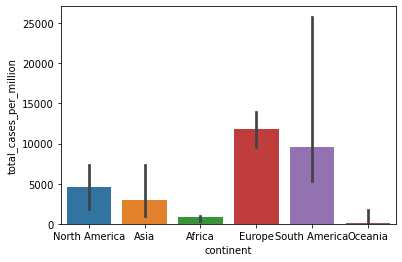

In [23]:
# fg = sns.PairGrid(covid_df,                     
#                        x_vars=['continent'],
#                        y_vars=["total_cases_per_million", "total_deaths_per_million", 'mortality_rate'],aspect=1.5,height=3)
# fg.map(sns.barplot)
# fg.add_legend()


ax =sns.barplot(x='continent',y='total_cases_per_million', data = covid_df, estimator=median)


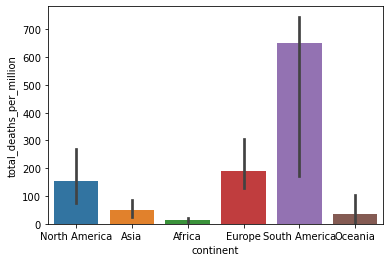

In [24]:
ax =sns.barplot(x='continent',y='total_deaths_per_million', data = covid_df, estimator=median)

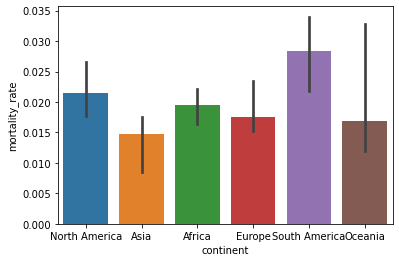

In [25]:
ax =sns.barplot(x='continent',y='mortality_rate', data = covid_df, estimator=median)